# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. Use this notebook to create your visualizations.

Below we set up the dataframe with the Goodreads dataset for you. If you run this cell, you may get an error that some lines were skipped. Do not worry about that! For this studio, we want to focus on creating an effective

In [2]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("data/books.csv", error_bad_lines=False)
df



C:\Users\Katerina\AppData\Local\Temp\ipykernel_21884\2353956452.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("data/books.csv", error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))
print()

bookID - 0%
title - 0%
authors - 0%
average_rating - 0%
isbn - 0%
isbn13 - 0%
language_code - 0%
  num_pages - 0%
ratings_count - 0%
text_reviews_count - 0%
publication_date - 0%
publisher - 0%
year - 0%



In [28]:
years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years


In [31]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [33]:
pub_books = df.groupby('publication_date')['year'].sum().reset_index()
pub_books

,publication_date,year
0,1/1/1900,1900
1,1/1/1913,1913
2,1/1/1914,1914
3,1/1/1919,1919
4,1/1/1921,19211921
...,...,...
3674,9/9/2003,2003200320032003200320032003200320032003200320...
3675,9/9/2004,2004200420042004
3676,9/9/2008,2008
3677,9/9/2009,2009


In [39]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

Text(0, 0.5, 'Number of Books Published')

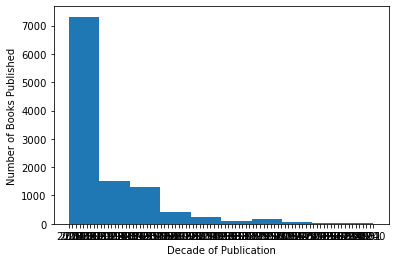

In [52]:
plt.hist(x=df["year"])
plt.xlabel("Decade of Publication")
plt.ylabel("Number of Books Published")


In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
df['year'].value_counts()

2006    1700
2005    1260
2004    1069
2003     931
2002     798
        ... 
1947       1
1922       1
1929       1
1919       1
1940       1
Name: year, Length: 87, dtype: int64

In [22]:
df['publication_date'].value_counts

<bound method IndexOpsMixin.value_counts of 0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object>

With your dataframe set up, time to start creating visualizations!

In [27]:
# Use your Python skills to create a visualization here.
df_box = pd.DataFrame(df.loc[['year' , 'publication_date' ], years].T)

df_box.plot(kind ='box')
plt.title('Number of Books Published Per Year' , color ='orange')
plt.xlabel('Years' , color = 'w')
plt.ylabel('Publication Dates' , color ='w')
plt.savefig('box_vertical.png')
#plt.savefig('bar_vertical.png')

KeyError: "None of [Index(['year', 'publication_date'], dtype='object')] are in the [index]"

In [13]:
# Use your Python skills to create a visualization here.
